# Exercise1 - Linear Regression

### Scenario: Housing Prices
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on the recent houses sold and make a model of housing prices.

The first column of training set is the size of house(in square feet), the second column is the number of bedrooms and the third column is the price of the house.

Here, we will implement linear regression with multiple variables(House Sizes, Bedrooms) to predict prices of the houses.



In [29]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#This is a magic command. It will display the plotting image directly below the code cell
%matplotlib inline  

In [30]:
dataFilePath = os.getcwd() + '/Data/ex1data2.txt'
data = pd.read_csv(dataFilePath, names = ['HouseSize','Bedroom','Price'])

data.head() #by default displays first 5 rows. head(n) displays first 'n' rows

,HouseSize,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**It is often useful to understand the data by visualizing it.**

Text(0.5,0,'Price')

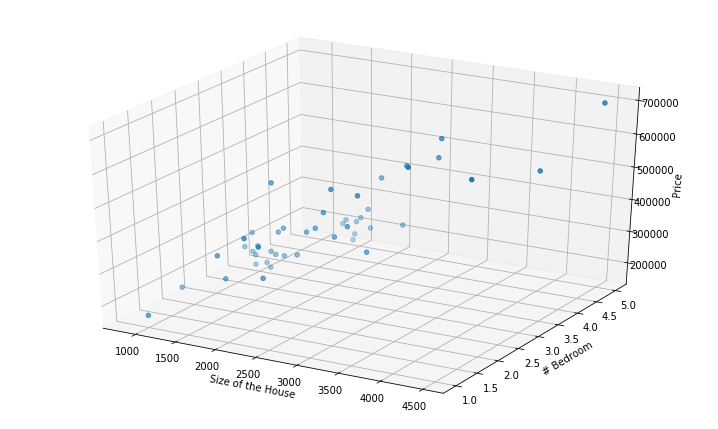

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=data['HouseSize'], ys=data['Bedroom'], zs=data['Price'])

ax.set_ylabel('# Bedroom'); ax.set_xlabel('Size of the House'); ax.set_zlabel('Price')

## Feature Scaling

By looking at the values, we can note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [32]:
data = (data - data.mean()) / data.std()
data.head()

,HouseSize,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389



## Cost Function
$ J(\Theta ) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})^{2} $


$ h_{\Theta }\left (X \right ) = \Theta ^{T}X = \Theta _{0} + \Theta _{1}x_{1} + \Theta _{2}x_{2}$

In [33]:
def computeCost(X, y, theta):
    m = y.size
    h_theta_x = X * theta.T 
    squared_error = np.square(h_theta_x - y)
    J_theta = (1/ (2*m)) * np.sum(squared_error)
    return J_theta    

**We add a column of ones to the training data so that we can use a Vectorized solution in computing Cost Function and Gradient Descent.**

$ h_{\Theta }\left (X \right ) = \Theta ^{T}X = \Theta _{0}x_{0} + \Theta _{1}x_{1} + \Theta _{2}x_{2} $

In [34]:
data.insert(0, 'Ones',1)
cols = data.shape[1]

X = data.iloc[:, 0:cols-1]
X.head()

,Ones,HouseSize,Bedroom
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [35]:
y = data.iloc[:, cols-1:cols]
y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [36]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0,0])

In [37]:
X.shape, y.shape, theta.shape

((47, 3), (47, 1), (1, 3))

**Cost of the solution with $\Theta$ initialised to zeros.**

In [38]:
computeCost(X, y, theta)

0.4893617021276596

## Gradient Decent

$\Theta_{j} := \Theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$
  (simultaneous update of $\Theta_{j}$ for all j)

With each step of gradient descent, the parameters $\Theta_{j}$ comes closer to the optimal values that will achieve the lowest cost $J(\Theta)$.

In [39]:
def gradientDescent(X, y, theta, alpha= 0.01, num_iters= 1500):
    m = y.size
    J_theta_history = np.zeros(num_iters)
    temp = np.matrix(np.zeros(theta.shape))
    for iter in range(num_iters):
        h_theta_x = X * theta.T
        error = h_theta_x - y
        for i in range(theta.size):
            temp[:,i] = theta[:,i] - (alpha/m) * np.sum(np.multiply(error, X[:,i]))
        
        theta = temp
        J_theta_history[iter] = computeCost(X,y, theta)
    return theta, J_theta_history
        

**We can check if the gradient descent is working fine by looking at the values of $J(\Theta)$ and check that it is decreasing with each step. $J(\Theta)$ should never increase and it should converge to a steady value by the end of the algorithm.**

Minimised theta:  [[-1.10856950e-16  8.84042349e-01 -5.24551809e-02]]


Text(0.5,1,'Convergence of the Cost Function ( $J(\\Theta)$ )')

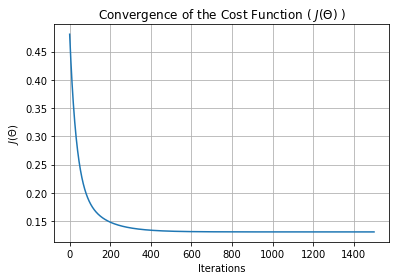

In [40]:
minimised_theta , J_theta = gradientDescent(X, y, theta)
print('Minimised theta: ',minimised_theta.ravel())

plt.plot(J_theta)
plt.grid(True)

plt.ylabel('$J(\Theta)$')
plt.xlabel('Iterations');
plt.title('Convergence of the Cost Function ( $J(\Theta)$ )')

Text(0.5,0,'Price')

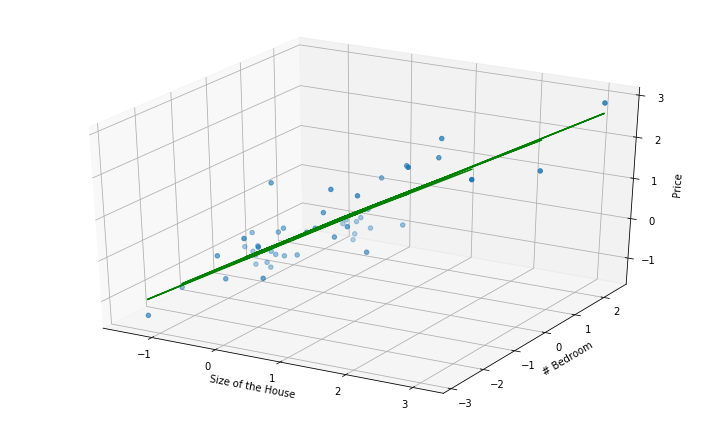

In [41]:
hypothesis = minimised_theta[0, 0] + (minimised_theta[0, 1] * data['HouseSize'] ) + (minimised_theta[0, 2] * data['Bedroom'])

fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(xs=data['HouseSize'], ys=data['Bedroom'], zs=data['Price'])
ax2.plot(data['HouseSize'],data['Bedroom'], hypothesis, color='green')

ax2.set_ylabel('# Bedroom'); ax2.set_xlabel('Size of the House'); ax2.set_zlabel('Price')

## Linear Regression using Scikit- learn

In [42]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

cols = X.shape[1]    # Number of columns in X
regr.fit(X[:,1:cols], y) # Train the model using the training sets


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Comparing the results of our implementation with the scikit-learn **

In [43]:
print('Prediction of Price of the house of size 2500 sq feet and 3 bedrooms')
our_prediction = minimised_theta[0, 0] + (minimised_theta[0, 1] * 2500) + (minimised_theta[0, 2] * 3)
print('Our implementation: $', our_prediction)

test_data = np.array([2500,3]).reshape(1,-1)
sci_prediction = regr.predict(test_data)
print('      Scikit-learn: $', sci_prediction[0][0])

Prediction of Price of the house of size 2500 sq feet and 3 bedrooms
Our implementation: $ 2209.948506901167
      Scikit-learn: $ 2211.7554331783913


In [44]:
# method 2 of predicting using scikit-learn

prediction = regr.intercept_ + regr.coef_[0][0] * 2500 + regr.coef_[0][1] * 3
print('$',prediction[0])

$ 2211.7554331783913


In [54]:
# intercept is theta0, coefficients are theta1 and theta2

print('Theta values (Our Implementation): ', minimised_theta)
print('Theta values (Scikit-learn): ')
regr.intercept_, regr.coef_

Theta values (Our Implementation):  [[-1.10856950e-16  8.84042349e-01 -5.24551809e-02]]
Theta values (Scikit-learn): 


(array([-7.54629735e-17]), array([[ 0.88476599, -0.05317882]]))